In [2]:
# pip install numpy pandas lingam matplotlib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import lingam
import matplotlib.pyplot as plt
import networkx as nx

pd.set_option("display.max_columns", None)

In [3]:
# Importing the dataset from the csv file
filepath = "https://raw.githubusercontent.com/percw/Norwegian_oil_gas_decarbonization/main/data/output/emissions_and_production/cleaned/fields_prod_emissions_intensities_share_1997_2023.csv"

# Creating a check if import is successful
try:
    data = pd.read_csv(filepath, sep=",")
    print("Data import successful")
except:
    print("Data import failed")

Data import successful


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Columns: 106 entries, field to oil_gas_reserve_ratio
dtypes: bool(1), float64(93), int64(5), object(7)
memory usage: 1.2+ MB


In [5]:
# Convert the boolean column to a dummy variable (0/1)
data["field_in_emissions_dummy"] = data["field_in_emissions"].astype(int)

data = data.dropna()

data.describe(include="all")

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw,imported_power_2023_gwh/y,yearly_tco2e_gwp100,yearly_tco2e_gwp20,kgco2e/toe_int_gwp100,share_peak_prod,oe_cum_sum_prod,share_reserve_of_original_reserve,oe_fac_prod_mill_sm3,yearly_fac_tco2e_gwp100,oe_share_prod,yearly_tco2e_prod_share_emissions,share_intensity_tco2e/toe_gwp100,gas_reserve_ratio,oil_reserve_ratio,oil_gas_reserve_ratio,field_in_emissions_dummy
count,762,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762,762,7.620000e+02,762,762,762.000000,762.000000,762.000000,762.000000,762.000000,762.0,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762,762.000000,762.000000,762.000000,7.620000e+02,762,762,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,7.620000e+02,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.0
unique,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
data.columns.tolist()

['field',
 'year',
 'net_oil_prod_yearly_mill_sm3',
 'net_gas_prod_yearly_bill_sm3',
 'net_ngl_prod_yearly_mill_sm3',
 'net_condensate_prod_yearly_mill_sm3',
 'net_oil_eq_prod_yearly_mill_sm3',
 'produced_water_yearly_mill_sm3',
 'field_id',
 'net_oil_prod_monthly_sm3_volatility',
 'net_gas_prod_monthly_sm3_volatility',
 'net_ngl_prod_monthly_sm3_volatility',
 'net_condensate_prod_monthly_sm3_volatility',
 'net_oil_eq_prod_monthly_sm3_volatility',
 'produced_water_in_field_volatility',
 'status',
 'current_status',
 'field_owner',
 'processing_field',
 'field_in_emissions',
 'facilities_lifetime_mean',
 'facilities_lifetime_std',
 'facilities_water_depth_mean',
 'facilities_water_depth_std',
 'subsea_facilites_shut_down',
 'surface_facilites_shut_down',
 'subsea_facilites_in_service',
 'surface_facilites_in_service',
 'facility_kind_multi well template',
 'facility_kind_single well template',
 'facility_kind_offshore wind turbine',
 'facility_kind_subsea structure',
 'facility_kind_fps

In [7]:
data

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw,imported_power_2023_gwh/y,yearly_tco2e_gwp100,yearly_tco2e_gwp20,kgco2e/toe_int_gwp100,share_peak_prod,oe_cum_sum_prod,share_reserve_of_original_reserve,oe_fac_prod_mill_sm3,yearly_fac_tco2e_gwp100,oe_share_prod,yearly_tco2e_prod_share_emissions,share_intensity_tco2e/toe_gwp100,gas_reserve_ratio,oil_reserve_ratio,oil_gas_reserve_ratio,field_in_emissions_dummy
4,yme,1997,1.97977,0.00000,0.00000,0.0,1.97977,0.00000,43807,0.056455,0.000000,0.000000,0.0,0.056455,0.000000,Producing,Producing,2786469.0,yme,True,20.000000,7.071068,86.400000,7.797435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,3.0,0.0,16.0,14.0,5.0,3299.333333,124.925311,87.666667,9.237604,207.0,972.0,133.201530,920149790.0,repsol norge as,126.134389,1317.523650,3.485140,4.451500e+04,"{'Den norske stats oljeselskap a.s': 65.0, 'Sa...","{'Equinor ASA': 25.0, 'Wintershall Dea Norge A...",6.28,0.00,0.00,0.0,6.28,15.81,0.00,0.00,0.0,15.81,0,0,0,0.0,526972.562070,533783.819076,316.879379,100.000000,1.97977,87.477736,1.97977,5.269726e+05,1.000000,526972.562070,316.879379,0.000000,1.000000,inf,1
5,njord,1997,0.36702,0.00000,0.00000,0.0,0.36702,0.00000,43751,0.064136,0.000000,0.000000,0.0,0.064136,0.000000,Approved for production,Producing,40585.0,njord,True,23.750000,2.500000,319.095238,49.971897,0.0,0.0,16.0,3.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,2.0,2.0,2.0,0.0,6.0,2366.300000,799.454927,330.000000,0.000000,2052.0,7150.0,74.143500,993246581.0,equinor energy as,49.794762,662.190000,0.502968,1.028000e+03,"{'Den norske stats oljeselskap a.s': 50

In [100]:
# List of variables to select
selected_columns = [
    # "year",
    "net_oil_eq_prod_yearly_mill_sm3",
    "net_oil_eq_prod_monthly_sm3_volatility",
    "investments_mill_nok",
    "future_investments_mill_nok",
    "current_remaining_recoverable_oe",
    "original_recoverable_oil",
    "original_recoverable_gas",
    "original_recoverable_oe",
    "electrified",
    # "imported_power_2023_gwh/y",
    "yearly_tco2e_gwp100",
    "kgco2e/toe_int_gwp100",
    "share_peak_prod",
    "share_reserve_of_original_reserve",
    "oe_share_prod",
    "yearly_tco2e_prod_share_emissions",
    "share_intensity_tco2e/toe_gwp100",
    "gas_reserve_ratio",
    # "facilities_water_depth_mean",
    "facilities_water_depth_std",
    # "well_status_closed",
    # "well_status_drilling",
    # "well_status_injecting",
    # "well_status_junked",
    # "well_status_online/operational",
    # "well_status_p&a",
    # "well_status_plugged",
    # "well_status_producing",
    # "well_status_suspended",
    # "well_purpose_injection",
    # "well_purpose_observation",
    # "well_purpose_production",
    "well_subsea_no",
    "well_subsea_yes",
    "well_final_vertical_depth_mean",
    "well_final_vertical_depth_std",
    "well_water_depth_mean",
    "well_water_depth_std",
    "yearly_water_emissions_m3",
]

# Select the specified variables
data_selected = data[selected_columns]
data_selected = data_selected.dropna()

In [101]:
pretty_print_names = {
    "year": "Year",
    "net_oil_eq_prod_yearly_mill_sm3": "Oil Eq. Production",
    "net_oil_eq_prod_monthly_sm3_volatility": "Oil Eq. Production Volatility)",
    "field_in_emissions_dummy": "Field in Emissions (Dummy)",
    "facilities_lifetime_std": "Facilities Lifetime (Std. Dev.)",
    "facilities_water_depth_mean": "Facilities Water Depth (Mean)",
    "investments_mill_nok": "Investments (Mill. NOK)",
    "future_investments_mill_nok": "Future Investments (Mill. NOK)",
    "current_remaining_recoverable_oe": "Current Remaining Oil Eq.",
    "original_recoverable_oil": "Original Recoverable Oil",
    "original_recoverable_gas": "Original Recoverable Gas",
    "original_recoverable_oe": "Original Recoverable OE",
    "electrified": "Electrified",
    "electricity_mw": "Electricity (MW)",
    "imported_power_2023_gwh/y": "Imported Power",
    "yearly_tco2e_gwp100": "CO2e Emissions",
    "kgco2e/toe_int_gwp100": "Emission Intensity",
    "share_peak_prod": "Share of Peak Production",
    "share_reserve_of_original_reserve": "Share of Reserve of Original Reserve",
    "oe_fac_prod_mill_sm3": "Oil Eq. Facility Production",
    "yearly_fac_tco2e_gwp100": "Facility CO2e Emissions",
    "oe_share_prod": "OE Share Production",
    "yearly_tco2e_prod_share_emissions": "CO2e Prod Share Emissions",
    "share_intensity_tco2e/toe_gwp100": "Dist. Emission Intensity",
    "gas_reserve_ratio": "Gas Reserve Ratio",
    "facilities_water_depth_mean": "Facilities Water Depth (Mean)",
    "facilities_water_depth_std": "Facilities Water Depth (Std. Dev.)",
    "well_status_closed": "Well Status (Closed)",
    "well_status_drilling": "Well Status (Drilling)",
    "well_status_injecting": "Well Status (Injecting)",
    "well_status_junked": "Well Status (Junked)",
    "well_status_online/operational": "Well Status (Online/Operational)",
    "well_status_p&a": "Well Status (P&A)",
    "well_status_plugged": "Well Status (Plugged)",
    "well_status_producing": "Well Status (Producing)",
    "well_status_suspended": "Well Status (Suspended)",
    "well_purpose_injection": "Well Purpose (Injection)",
    "well_purpose_observation": "Well Purpose (Observation)",
    "well_purpose_production": "Well Purpose (Production)",
    "well_subsea_no": "Well Subsea (No)",
    "well_subsea_yes": "Well Subsea (Yes)",
    "well_final_vertical_depth_mean": "Well Final Vertical Depth (Mean)",
    "well_final_vertical_depth_std": "Well Final Vertical Depth (Std. Dev.)",
    "well_water_depth_mean": "Well Water Depth (Mean)",
    "well_water_depth_std": "Well Water Depth (Std. Dev.)",
    "oe_cum_sum_prod": "Oil Eq. Cumulative Sum Production",
    "yearly_water_emissions_m3": "Water Emissions",
}

In [102]:
if "electrified" in data_selected.columns:
    data_selected["electrified"] = data_selected["electrified"].astype(int)

# Remove columns with zero variance
data_selected = data_selected.loc[:, (data_selected != data_selected.iloc[0]).any()]

# Standardize the data
scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected)

# Applying LinGAM to the preprocessed data
# Instantiate the DirectLiNGAM model
model = lingam.DirectLiNGAM()

# Fit the model to the data
model.fit(data_selected_scaled)

# Get the estimated adjacency matrix
adjacency_matrix = model.adjacency_matrix_

# Print the adjacency matrix
print("Adjacency Matrix:\n", adjacency_matrix)

Adjacency Matrix:
 [[ 0.          0.38775283  0.          0.07457858  0.46021706  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.07384024  0.          0.          0.05218381  0.04743737  0.
   0.09608156]
 [ 0.          0.          0.09618727  0.          0.821491    0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.07984971  0.          0.06174558  0.0943585   0.
   0.        ]
 [ 0.          0.          0.          0.          0.52174228  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.31090926  0.          0.          0.          0.          0.1092432
  -0.11924108]
 [ 0.          0.          0.26020211  0.          0.25075646  0.
   0.          0.          0.          0.          0.          0.
   0.

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_17466/2129997694.py:26: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


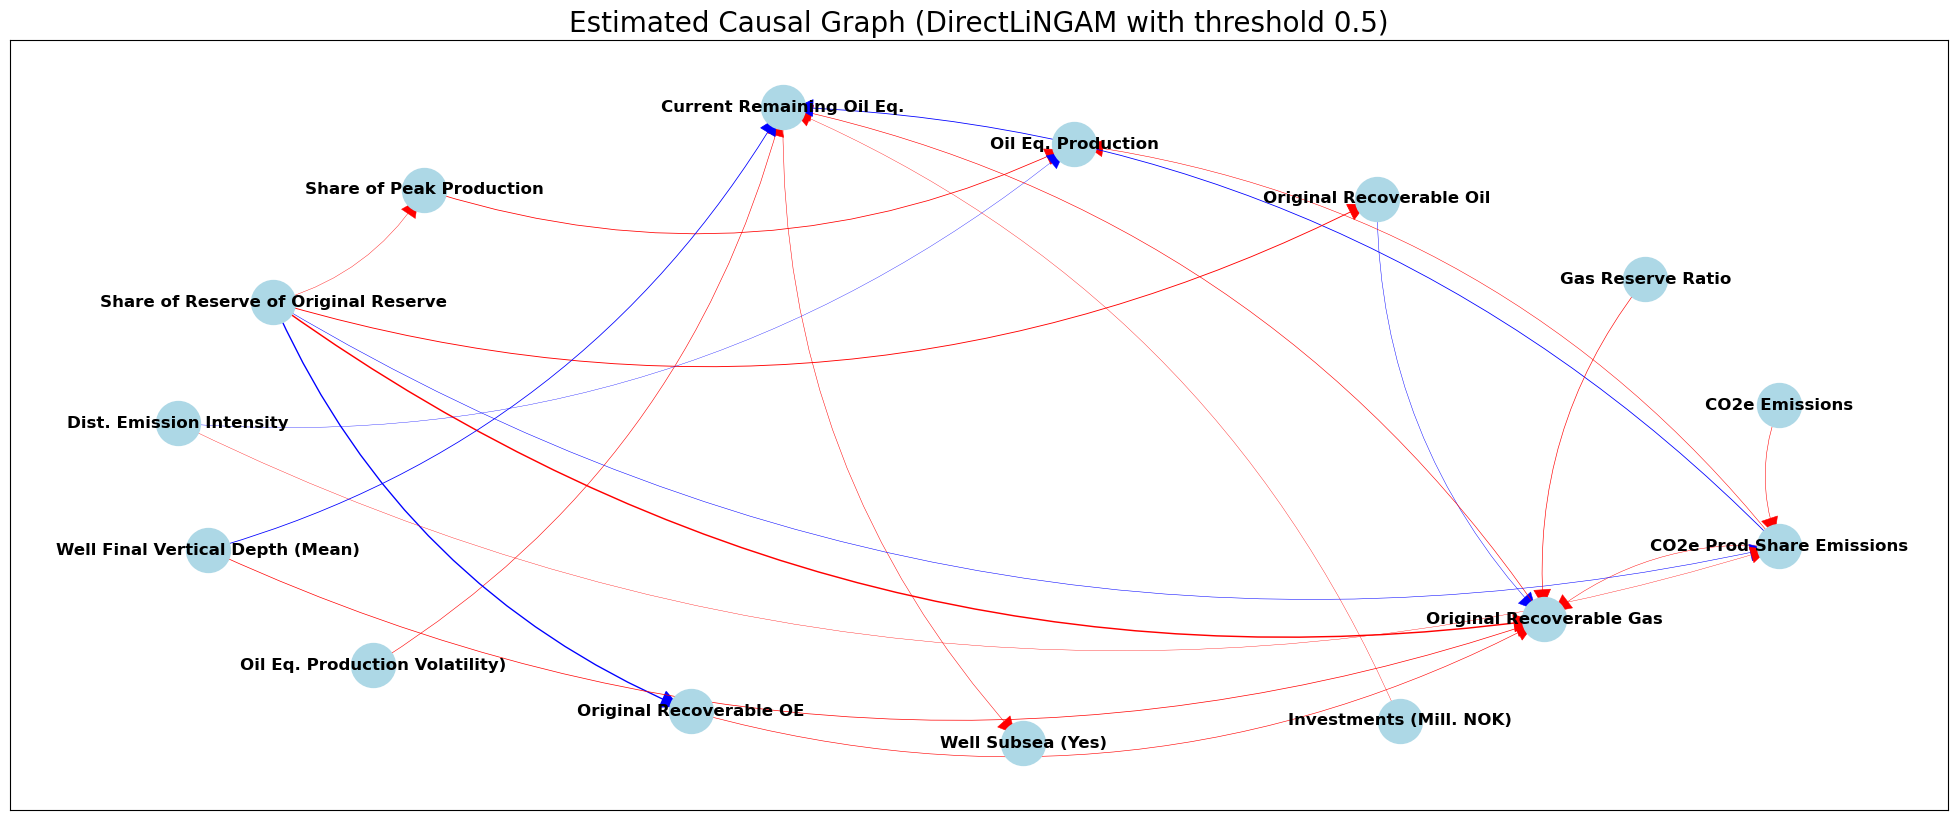

In [103]:
# Threshold for filtering edges
threshold = 0.5

# Create a directed graph from the adjacency matrix with threshold
G = nx.DiGraph()
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if abs(adjacency_matrix[i, j]) > threshold:
            G.add_edge(
                pretty_print_names[selected_columns[i]],
                pretty_print_names[selected_columns[j]],
                weight=adjacency_matrix[i, j],
            )

# Draw the graph with curved edges
plt.figure(figsize=(25, 10))
pos = nx.spring_layout(G, k=10)  # Increase k for more distance between nodes
edges = G.edges(data=True)

weights = [
    abs(edge[2]["weight"]) * 0.5 for edge in edges
]  # Increase edge width for better visibility

colors = ["red" if edge[2]["weight"] > 0 else "blue" for edge in edges]
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    width=weights,
    edge_color=colors,
    arrowstyle="-|>",
    arrowsize=30,
    connectionstyle="arc3,rad=0.2",
)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")


plt.title(
    f"Estimated Causal Graph (DirectLiNGAM with threshold {threshold})", fontsize=20
)
plt.show()

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_17466/1701060095.py:26: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


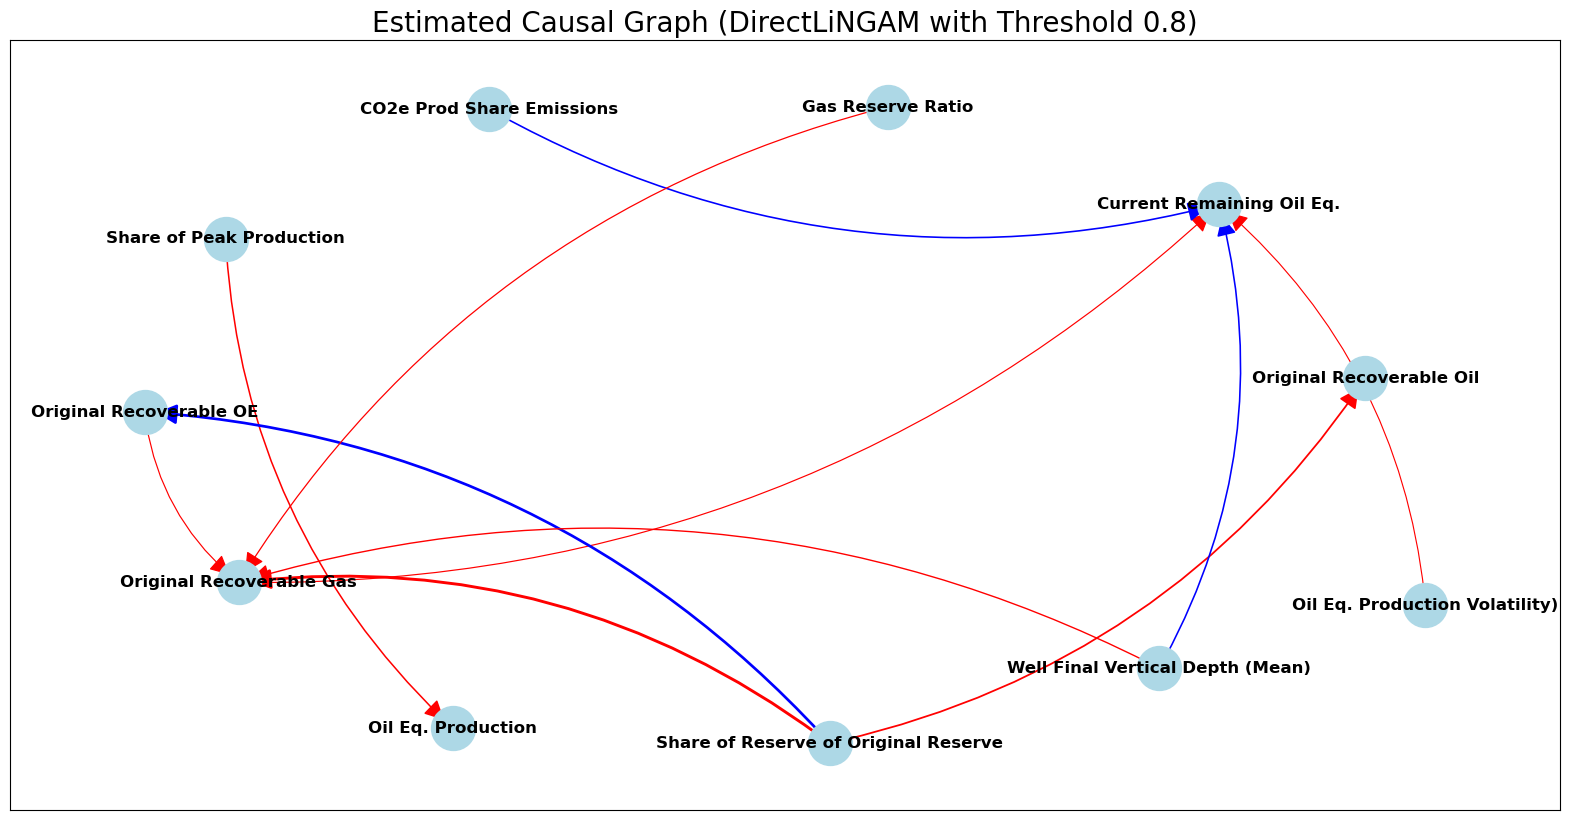

In [104]:
# Threshold for filtering edges
threshold = 0.8

# Create a directed graph from the adjacency matrix with threshold
G = nx.DiGraph()
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if abs(adjacency_matrix[i, j]) > threshold:
            G.add_edge(
                pretty_print_names[selected_columns[i]],
                pretty_print_names[selected_columns[j]],
                weight=adjacency_matrix[i, j],
            )

# Draw the graph with curved edges
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, k=10)  # Increase k for more distance between nodes
edges = G.edges(data=True)

weights = [
    abs(edge[2]["weight"]) * 1 for edge in edges
]  # Increase edge width for better visibility

colors = ["red" if edge[2]["weight"] > 0 else "blue" for edge in edges]
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    width=weights,
    edge_color=colors,
    arrowstyle="-|>",
    arrowsize=30,
    connectionstyle="arc3,rad=0.2",
)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
plt.title(
    f"Estimated Causal Graph (DirectLiNGAM with Threshold {threshold})", fontsize=20
)
plt.show()

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_17466/30705170.py:28: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


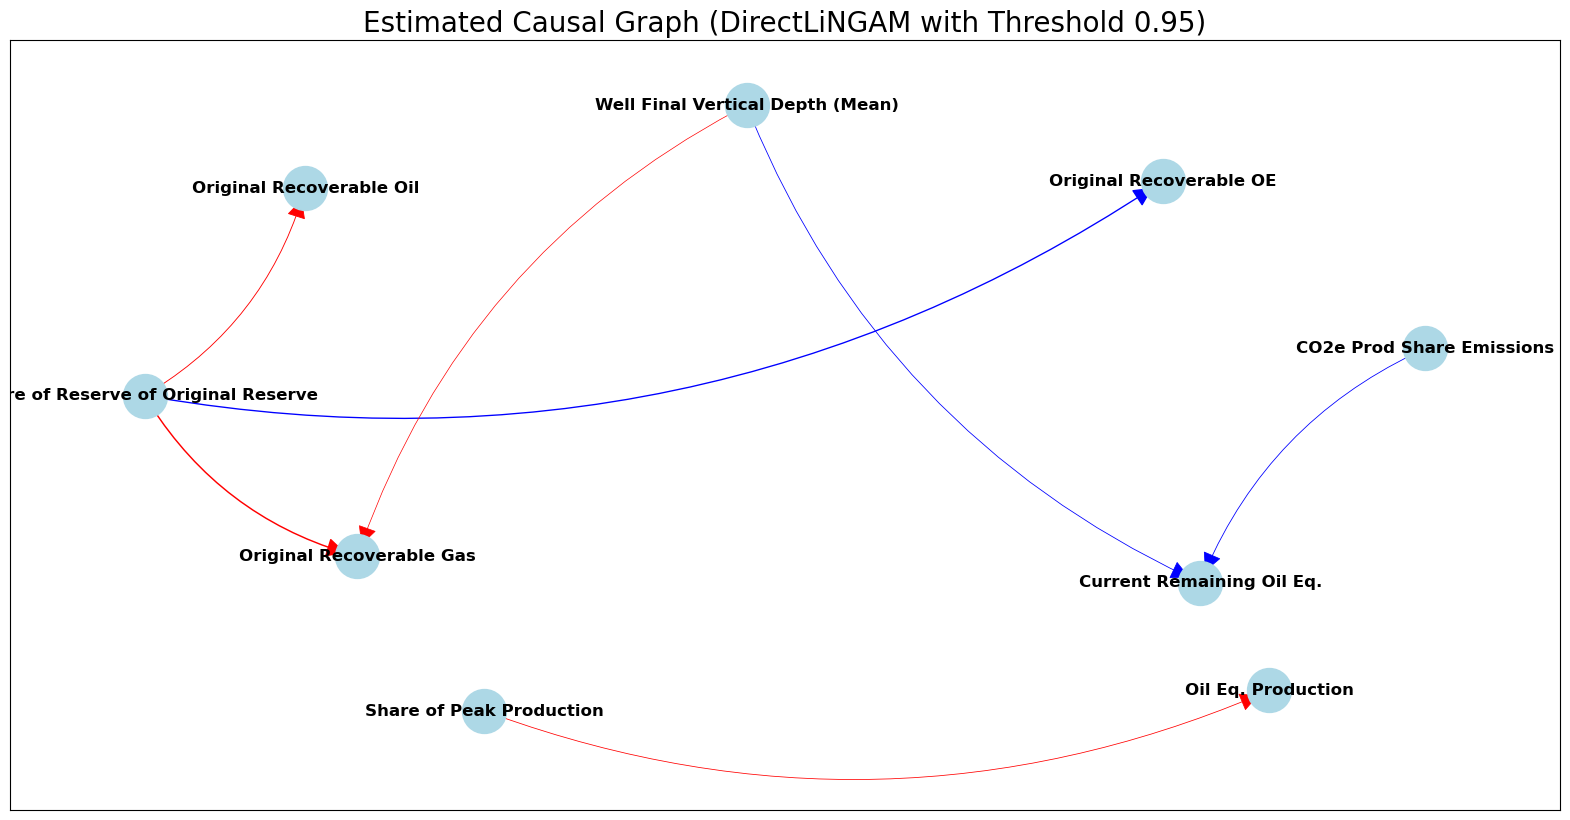

In [105]:
# Threshold for filtering edges
threshold = 0.95

# Create a directed graph from the adjacency matrix with threshold
G = nx.DiGraph()
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if abs(adjacency_matrix[i, j]) > threshold:
            G.add_edge(
                pretty_print_names[selected_columns[i]],
                pretty_print_names[selected_columns[j]],
                weight=adjacency_matrix[i, j],
            )

# Draw the graph with curved edges
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, k=10)  # Increase k for more distance between nodes
edges = G.edges(data=True)
weights = [
    abs(edge[2]["weight"]) * 0.5 for edge in edges
]  # Increase edge width for better visibility
colors = ["red" if edge[2]["weight"] > 0 else "blue" for edge in edges]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")

# Draw edges
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    width=weights,
    edge_color=colors,
    arrowstyle="-|>",
    arrowsize=30,
    connectionstyle="arc3,rad=0.2",
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
plt.title(
    f"Estimated Causal Graph (DirectLiNGAM with Threshold {threshold})", fontsize=20
)
plt.show()